# OBJECTIVE : MANAGING UNBALANCED DATASETS

In [1]:
#Required pip package for scikitlearn
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import librairies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from collections import Counter
from numpy import where

from imblearn.over_sampling import SMOTE


C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarni

# Building an imbalanced dataset from 0

In [3]:
# define dataset
X, y = make_classification(n_samples=10000, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1, 
                           weights=[0.99], 
                           flip_y=0, 
                           random_state=1)


In [4]:
#data and label 0/1 - X express features and y the label 0/1 in array (numpy)
X,y

(array([[0.22201371, 0.54020654],
        [1.34743875, 1.41282352],
        [0.53723817, 0.37273043],
        ...,
        [1.87813003, 0.82950037],
        [2.58593336, 1.92799501],
        [1.1233558 , 1.04575545]]), array([0, 0, 0, ..., 0, 0, 0]))

In [5]:
counter = Counter(y)
print(y)
y.shape
print(X)
X.shape

[0 0 0 ... 0 0 0]
[[0.22201371 0.54020654]
 [1.34743875 1.41282352]
 [0.53723817 0.37273043]
 ...
 [1.87813003 0.82950037]
 [2.58593336 1.92799501]
 [1.1233558  1.04575545]]


(10000, 2)

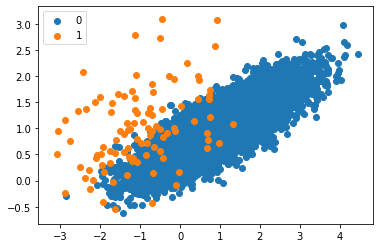

In [6]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [12]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Class 1 is underrepresented compared to class 0. A new balance is required.

# BALANCING BY OVERSAMPLING

In [10]:
# transform the dataset
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)


C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# summarize the new class distribution  -> Class 1 is now balanced
counter = Counter(y1)
print(counter)

Counter({0: 9900, 1: 9900})


Plotting datasets with and without oversampling side by side

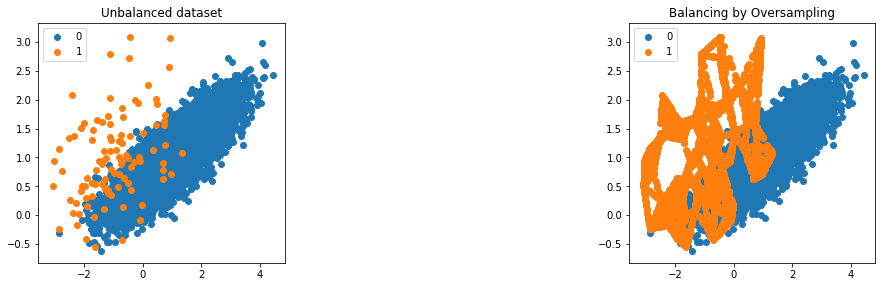

In [28]:
plt.figure(figsize=(15, 15))
#plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(331)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.title('Unbalanced dataset')


plt.subplot(333)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix1 = where(y1 == label)[0]
    plt.scatter(X1[row_ix1, 0], X1[row_ix1, 1], label=str(label))
plt.legend()
plt.title('Balancing by Oversampling')
plt.show()

# BALANCING BY UNDERSAMPLING

C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 100, 1: 100})


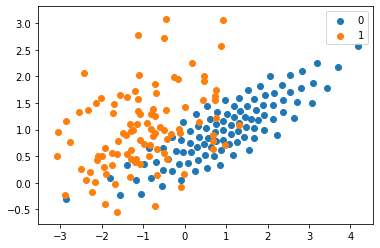

In [30]:
# Undersample with undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification


import matplotlib.pyplot as plt
from numpy import where

from imblearn.under_sampling import ClusterCentroids


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


#Random choice of centroid to 
cc = ClusterCentroids(random_state=0)

# transform the dataset
X_resampled, y_resampled = cc.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_resampled)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_resampled == label)[0]
    plt.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))
plt.legend()
plt.show()



# COMBINING STRATEGIES

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


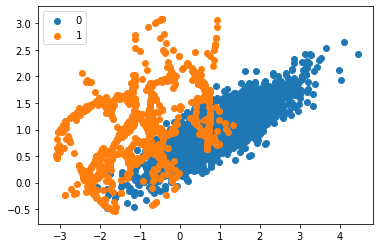

In [36]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from numpy import where

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline 6 hERE WE COMBINE over and under sampling methods 
#with ratio of 10% for oversampling and 50% for undersampling

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# TESTING ML ALGORITHMS WITH THESE DATASETS 

Decision Tree Model for unbalanced dataset  V1

In [53]:
# Decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define unbalanced dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

#Define Decision tree model
model = DecisionTreeClassifier()
# evaluate pipeline

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.767


Decision Tree Model for unbalanced dataset with over sampling dataset V2

In [58]:
# Decision tree evaluated on imbalanced dataset with oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#Define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

#Define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.825


Decision Tree Model for unbalanced dataset combining over and under sampling dataset V4

In [70]:
#classification using decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

#Define Decision tree model
model = DecisionTreeClassifier()

#Define Pipeline combining over (10%) and under (50%)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.834


Testing with K-nearest neighbors

In [73]:
#Evaluation for different values ok k
#classification using k-nn on unbalanced dataset with over and under sampling 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
#Values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define model and pipeline
    model = KNeighborsClassifier(n_neighbors=k)
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)

    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.822
> k=2, Mean ROC AUC: 0.863
> k=3, Mean ROC AUC: 0.878
> k=4, Mean ROC AUC: 0.890
> k=5, Mean ROC AUC: 0.899
> k=6, Mean ROC AUC: 0.907
> k=7, Mean ROC AUC: 0.910
